In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img = Image.open('iris.jpg')

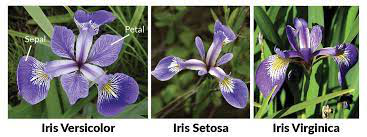

In [3]:
img

In [7]:
df = pd.read_csv('iris.csv')

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

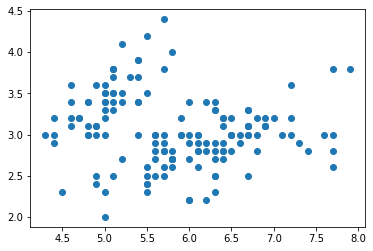

In [11]:
plt.scatter(df['sepal_length'],df['sepal_width'])

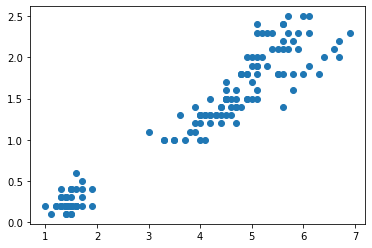

In [12]:
plt.scatter(df['petal_length'],df['petal_width'])

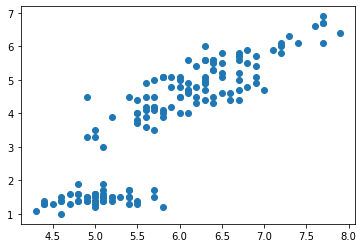

In [13]:
plt.scatter(df['sepal_length'],df['petal_length'])

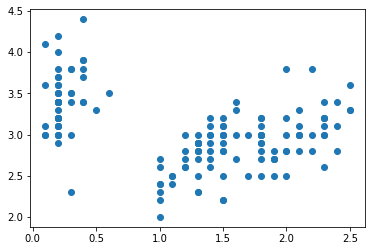

In [14]:
plt.scatter(df['petal_width'],df['sepal_width'])

In [15]:
import seaborn as sns

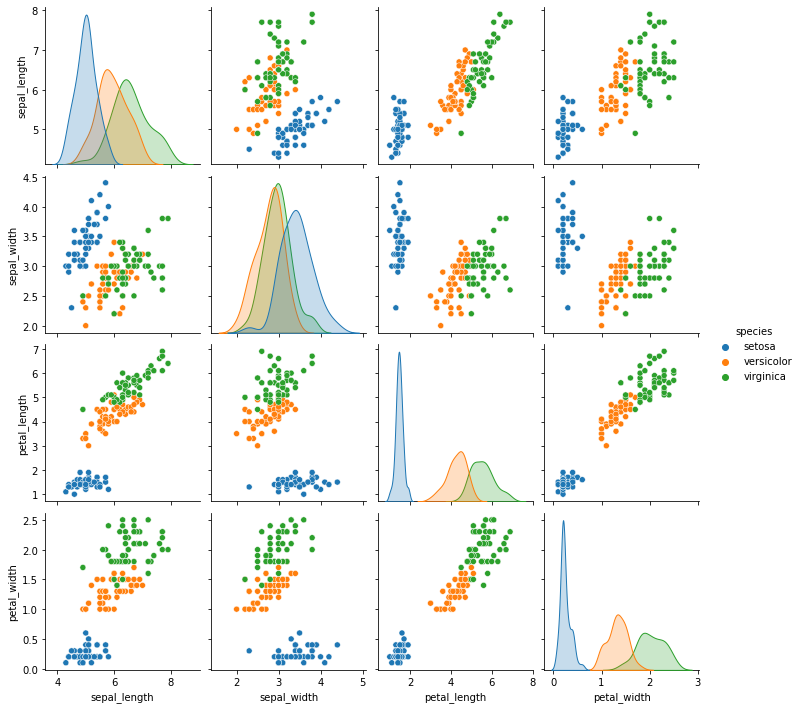

In [16]:
sns.pairplot(df, hue='species')

In [17]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df2 = df[(df['species']=='setosa')|(df['species']=='versicolor')]

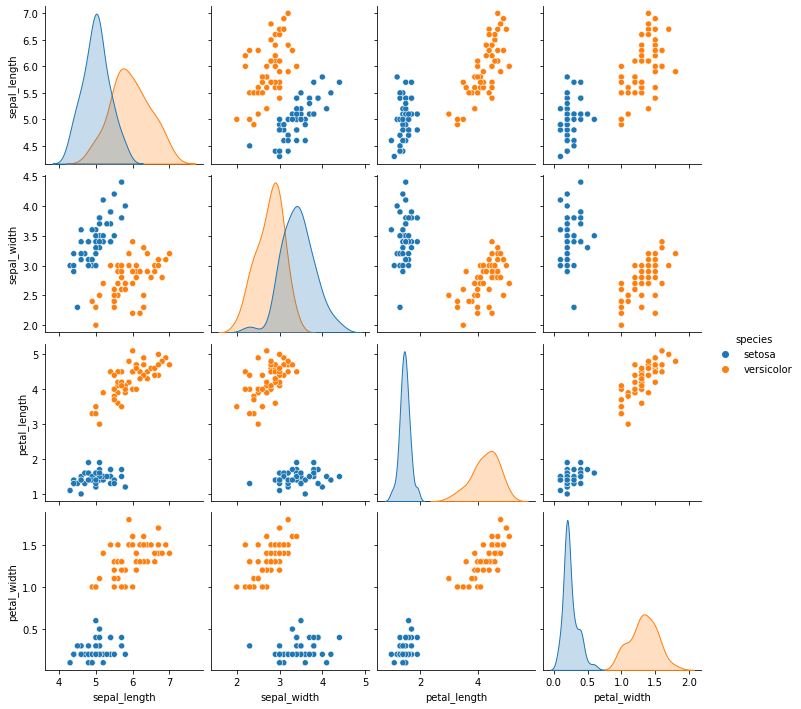

In [23]:
sns.pairplot(df2, hue='species')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(df2.drop('species',axis=1), df2['species'], test_size=0.25, random_state=101)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [27]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 13 to 95
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  75 non-null     float64
 1   sepal_width   75 non-null     float64
 2   petal_length  75 non-null     float64
 3   petal_width   75 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [28]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 16 to 2
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  25 non-null     float64
 1   sepal_width   25 non-null     float64
 2   petal_length  25 non-null     float64
 3   petal_width   25 non-null     float64
dtypes: float64(4)
memory usage: 1000.0 bytes


In [30]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [31]:
model = LogisticRegression().fit(xtrain,ytrain)

In [32]:
round(model.score(xtest,ytest)*100, 2)

100.0

In [33]:
df3 = df[(df['species']=='versicolor')|(df['species']=='virginica')]
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(df3.drop('species',axis=1), df3['species'], test_size=0.25, random_state=101)
model3 = LogisticRegression().fit(xtrain3,ytrain3)
round(model3.score(xtest3,ytest3)*100, 2)

100.0

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
ypred3 = model3.predict(xtest3)

In [36]:
print(confusion_matrix(ytest3, ypred3))

[[15  0]
 [ 0 10]]


In [37]:
print(classification_report(ytest3,ypred3))

              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [38]:
cancer_dataset = 'https://www.kaggle.com/uciml/breast-cancer-wisconsin-data'

In [39]:
cancer = pd.read_csv('data.csv')

In [40]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [44]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [45]:
cancer.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [46]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
x = cancer.drop('diagnosis',axis=1)
y = cancer['diagnosis']

In [70]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=101)

In [71]:
# LogisticRegressionCV()

In [72]:
model = LogisticRegression().fit(xtrain,ytrain)

In [73]:
ypred = model.predict(xtest)

In [75]:
print(confusion_matrix(ytest, ypred))

[[84  4]
 [ 4 51]]


In [76]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           B       0.95      0.95      0.95        88
           M       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [77]:
model.score(xtest,ytest)

0.9440559440559441